In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('/home/kushaj/Desktop/Data/')
train_path = path/'trashdata/'
test_path = path/'trashtest'

print(train_path.ls())
print(test_path.ls())

[PosixPath('/home/kushaj/Desktop/Data/trashdata/metal'), PosixPath('/home/kushaj/Desktop/Data/trashdata/glass'), PosixPath('/home/kushaj/Desktop/Data/trashdata/paper'), PosixPath('/home/kushaj/Desktop/Data/trashdata/.DS_Store'), PosixPath('/home/kushaj/Desktop/Data/trashdata/cardboard'), PosixPath('/home/kushaj/Desktop/Data/trashdata/models'), PosixPath('/home/kushaj/Desktop/Data/trashdata/plastic')]
[PosixPath('/home/kushaj/Desktop/Data/trashtest/metal'), PosixPath('/home/kushaj/Desktop/Data/trashtest/glass'), PosixPath('/home/kushaj/Desktop/Data/trashtest/paper'), PosixPath('/home/kushaj/Desktop/Data/trashtest/cardboard'), PosixPath('/home/kushaj/Desktop/Data/trashtest/plastic')]


In [3]:
src = (ImageList.from_folder(train_path)
                .split_by_rand_pct()
                .label_from_folder())

data = (src.transform(get_transforms(flip_vert=True), size=(128, 128))
           .databunch(num_workers=8, val_bs=64)
           .normalize(imagenet_stats))

data_test = (ImageList.from_folder(test_path)
                      .split_none()
                      .label_from_folder()
                      .transform(size=(128, 128))
                      .databunch(num_workers=8, val_bs=128)
                      .normalize(imagenet_stats))

test_set = data_test.train_dl

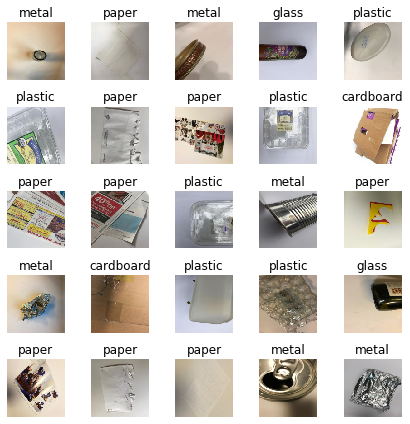

In [4]:
data.show_batch(figsize=(6,6))

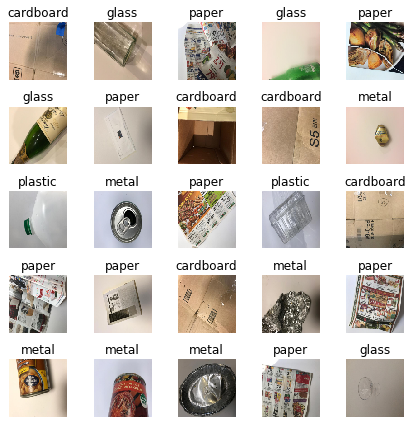

In [5]:
data_test.show_batch(figsize=(6,6))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time
0,1.461956,0.725011,0.810748,00:22
1,1.082257,0.692916,0.803738,00:19
2,0.873191,0.522892,0.841121,00:19
3,0.701408,0.478438,0.838785,00:19
4,0.573769,0.410340,0.871495,00:19
5,0.480332,0.354184,0.880841,00:19
6,0.397319,0.342493,0.887850,00:19
7,0.347024,0.341787,0.887850,00:19


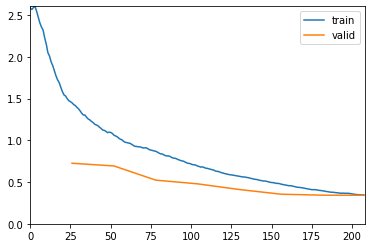

In [11]:
learn.fit_one_cycle(8)

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


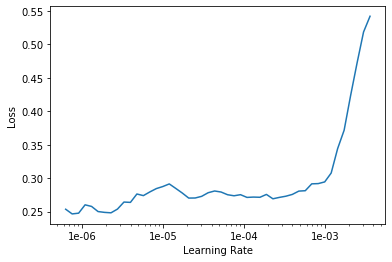

In [14]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.289800,0.344578,0.880841,00:25
1,0.267499,0.335754,0.890187,00:25
2,0.247022,0.336215,0.892523,00:25
3,0.253241,0.329545,0.894860,00:25
4,0.255690,0.331585,0.897196,00:25


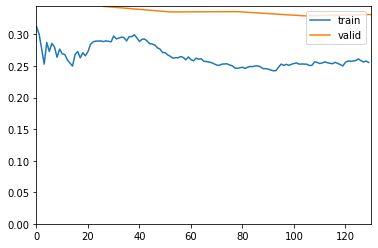

In [15]:
learn.fit_one_cycle(5, max_lr=5e-6)

In [16]:
data = (src.transform(get_transforms(flip_vert=True), size=(256, 256))
           .databunch(num_workers=8, val_bs=64)
           .normalize(imagenet_stats))

learn.data = data

In [17]:
learn.freeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: CUDA out of memory. Tried to allocate 64.00 MiB (GPU 0; 3.95 GiB total capacity; 2.94 GiB already allocated; 58.94 MiB free; 213.31 MiB cached)

In [20]:
learn.save('first', return_path=True)

PosixPath('/home/kushaj/Desktop/Data/trashdata/models/first.pth')